# Sheet 5

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import torch
import torch.nn as nn


## 2 Logistic regression: an LLM lie detector

This is how you can load a dataset of LLM activations. Use a new Datamanager if you want to have a new dataset. Use `add_dataset` multiple times on the same data manager if you want to combine datasets.

In [2]:
from lie_detection_utils import DataManager

path_to_datasets = "data/lie_detection/datasets"
path_to_acts = "data/lie_detection/acts"

# check if the datasets and activations are available
assert os.path.exists(path_to_datasets), "The path to the datasets does not exist."
assert os.path.exists(path_to_acts), "The path to the activations does not exist."

# these are the different datasets containing true and false factual statements about different topics
dataset_names = ["cities", "neg_cities", "sp_en_trans", "neg_sp_en_trans"]
dataset_name = dataset_names[0] # choose some dataset from the above datasets, index "0" loads the "cities" dataset for example

# the dataloader automatically loads the training data for us
dm = DataManager()
dm.add_dataset(dataset_name, "Llama3", "8B", "chat", layer=12, split=0.8, center=False,
                device='cpu', path_to_datasets=path_to_datasets, path_to_acts=path_to_acts)
acts_train, labels_train = dm.get('train') # train set
acts_test, labels_test = dm.get('val')
print(acts_train.shape, labels_train.shape)

torch.Size([1196, 4096]) torch.Size([1196])


In [3]:
# have a look at the statements that were fed to the LLM to produce the activations:
df = pd.read_csv(f"{path_to_datasets}/{dataset_name}.csv")
print(df.head(10))

                                        statement  label       city  \
0             The city of Krasnodar is in Russia.      1  Krasnodar   
1       The city of Krasnodar is in South Africa.      0  Krasnodar   
2                  The city of Lodz is in Poland.      1       Lodz   
3  The city of Lodz is in the Dominican Republic.      0       Lodz   
4            The city of Maracay is in Venezuela.      1    Maracay   
5                The city of Maracay is in China.      0    Maracay   
6              The city of Baku is in Azerbaijan.      1       Baku   
7                 The city of Baku is in Ukraine.      0       Baku   
8                  The city of Baoji is in China.      1      Baoji   
9              The city of Baoji is in Guatemala.      0      Baoji   

                  country correct_country  
0                  Russia          Russia  
1            South Africa          Russia  
2                  Poland          Poland  
3  the Dominican Republic          Poland 

/home/sam-hooper/venvs/basic/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test Accuracy: 0.9967
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       144
         1.0       1.00      0.99      1.00       156

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



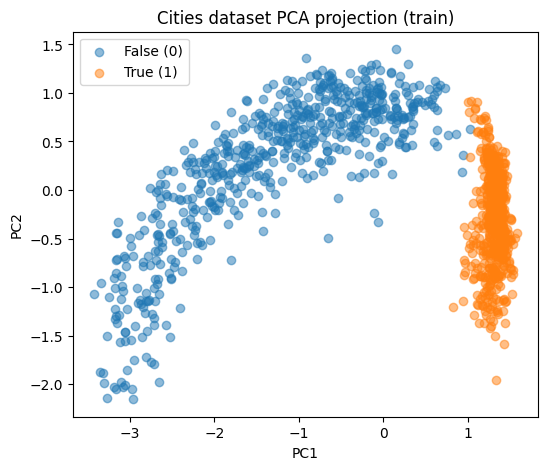

/home/sam-hooper/venvs/basic/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Trained on cities (reg=none)
Test on neg_cities: Accuracy = 0.5033
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       602
         1.0       0.00      0.00      0.00       594

    accuracy                           0.50      1196
   macro avg       0.25      0.50      0.33      1196
weighted avg       0.25      0.50      0.34      1196

----------------------------------------
Test on sp_en_trans: Accuracy = 0.8693
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89       144
         1.0       1.00      0.73      0.85       139

    accuracy                           0.87       283
   macro avg       0.90      0.87      0.87       283
weighted avg       0.90      0.87      0.87       283

----------------------------------------


/home/sam-hooper/venvs/basic/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/sam-hooper/venvs/basic/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/sam-hooper/venvs/basic/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", 

Test on neg_sp_en_trans: Accuracy = 0.5018
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       142
         1.0       0.00      0.00      0.00       141

    accuracy                           0.50       283
   macro avg       0.25      0.50      0.33       283
weighted avg       0.25      0.50      0.34       283

----------------------------------------


/home/sam-hooper/venvs/basic/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/sam-hooper/venvs/basic/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/sam-hooper/venvs/basic/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", 

Trained on cities (reg=l2)
Test on neg_cities: Accuracy = 0.4933
              precision    recall  f1-score   support

         0.0       0.49      1.00      0.66       590
         1.0       0.00      0.00      0.00       606

    accuracy                           0.49      1196
   macro avg       0.25      0.50      0.33      1196
weighted avg       0.24      0.49      0.33      1196

----------------------------------------


/home/sam-hooper/venvs/basic/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/sam-hooper/venvs/basic/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/sam-hooper/venvs/basic/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", 

Test on sp_en_trans: Accuracy = 0.9929
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       142
         1.0       1.00      0.99      0.99       141

    accuracy                           0.99       283
   macro avg       0.99      0.99      0.99       283
weighted avg       0.99      0.99      0.99       283

----------------------------------------
Test on neg_sp_en_trans: Accuracy = 0.5018
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       142
         1.0       0.00      0.00      0.00       141

    accuracy                           0.50       283
   macro avg       0.25      0.50      0.33       283
weighted avg       0.25      0.50      0.34       283

----------------------------------------


/home/sam-hooper/venvs/basic/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/sam-hooper/venvs/basic/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/sam-hooper/venvs/basic/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", 

Combined LR Test on sp_en_trans: Accuracy = 1.0000
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       141
         1.0       1.00      1.00      1.00       142

    accuracy                           1.00       283
   macro avg       1.00      1.00      1.00       283
weighted avg       1.00      1.00      1.00       283

----------------------------------------
Combined LR Test on neg_sp_en_trans: Accuracy = 0.9470
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94       138
         1.0       0.91      1.00      0.95       145

    accuracy                           0.95       283
   macro avg       0.95      0.95      0.95       283
weighted avg       0.95      0.95      0.95       283

----------------------------------------


/home/sam-hooper/venvs/basic/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [4]:
# Load dataset using DataManager
def load_dataset(dataset_name):
    dm = DataManager()
    dm.add_dataset(dataset_name, "Llama3", "8B", "chat", layer=12, split=0.8,
                   center=False, device='cpu', path_to_datasets=path_to_datasets, path_to_acts=path_to_acts)
    acts_train, labels_train = dm.get('train')
    acts_test, labels_test = dm.get('val')
    return acts_train, labels_train, acts_test, labels_test

# Part (a): Train Logistic Regression classifier without regularization
clf = LogisticRegression(penalty=None, solver='saga', max_iter=1000, tol=1e-4)
clf.fit(acts_train, labels_train)

# Evaluate on test set
y_pred = clf.predict(acts_test)
acc = accuracy_score(labels_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")
print(classification_report(labels_test, y_pred))

# %%
# Optional: visualize linear separability using PCA
def plot_2D_pca(X, y, title='PCA projection'):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(6,5))
    plt.scatter(X_pca[y==0,0], X_pca[y==0,1], label='False (0)', alpha=0.5)
    plt.scatter(X_pca[y==1,0], X_pca[y==1,1], label='True (1)', alpha=0.5)
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()

plot_2D_pca(acts_train, labels_train, title='Cities dataset PCA projection (train)')

# %%
# Part (b): Out-of-distribution evaluation
# Train on cities, test on other datasets
def cross_dataset_eval(train_dataset, test_datasets, reg='none'):
    acts_train, labels_train, _, _ = load_dataset(train_dataset)
    
    if reg=='none':
        clf = LogisticRegression(penalty=None, solver='saga', max_iter=1000, tol=1e-4)
    else:
        clf = LogisticRegression(penalty='l2', C=1.0, solver='saga', max_iter=1000)
    
    clf.fit(acts_train, labels_train)
    print(f"Trained on {train_dataset} (reg={reg})")
    
    for test_name in test_datasets:
        acts_test, labels_test, _, _ = load_dataset(test_name)
        y_pred = clf.predict(acts_test)
        acc = accuracy_score(labels_test, y_pred)
        print(f"Test on {test_name}: Accuracy = {acc:.4f}")
        print(classification_report(labels_test, y_pred))
        print('-'*40)

# Evaluate
cross_dataset_eval('cities', ['neg_cities','sp_en_trans','neg_sp_en_trans'], reg='none')
cross_dataset_eval('cities', ['neg_cities','sp_en_trans','neg_sp_en_trans'], reg='l2')

# %%
# Part (c): Train on combined datasets (cities + neg_cities)
acts_train1, labels_train1, _, _ = load_dataset('cities')
acts_train2, labels_train2, _, _ = load_dataset('neg_cities')

X_train_combined = np.vstack([acts_train1, acts_train2])
y_train_combined = np.hstack([labels_train1, labels_train2])

clf_combined = LogisticRegression(penalty=None, solver='saga', max_iter=1000, tol=1e-4)
clf_combined.fit(X_train_combined, y_train_combined)

# Evaluate on sp_en_trans and neg_sp_en_trans
for test_name in ['sp_en_trans','neg_sp_en_trans']:
    acts_test, labels_test, _, _ = load_dataset(test_name)
    y_pred = clf_combined.predict(acts_test)
    acc = accuracy_score(labels_test, y_pred)
    print(f"Combined LR Test on {test_name}: Accuracy = {acc:.4f}")
    print(classification_report(labels_test, y_pred))
    print('-'*40)

## 3 Log-sum-exp and soft(arg)max
### (b)

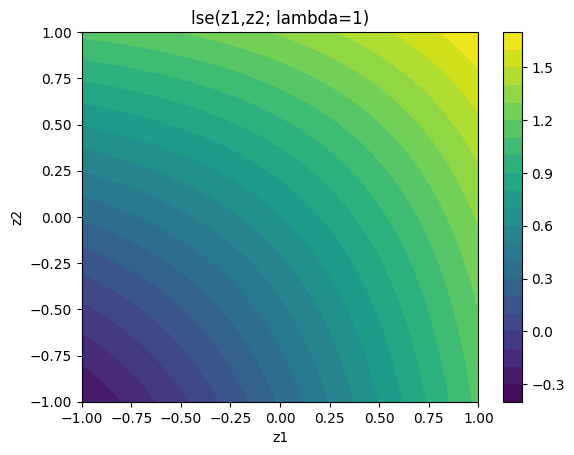

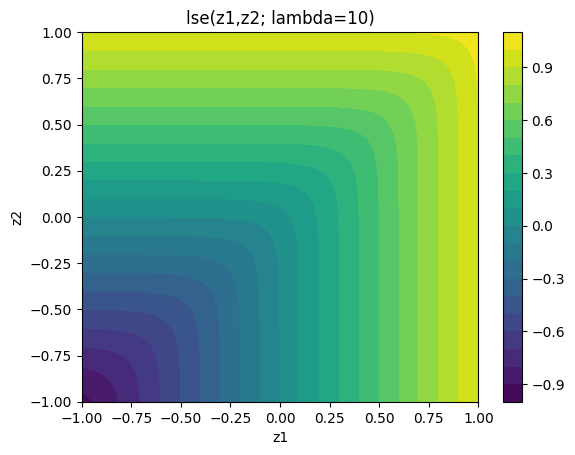

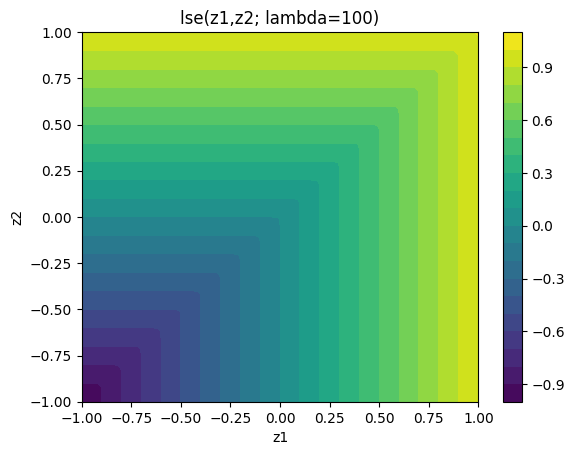

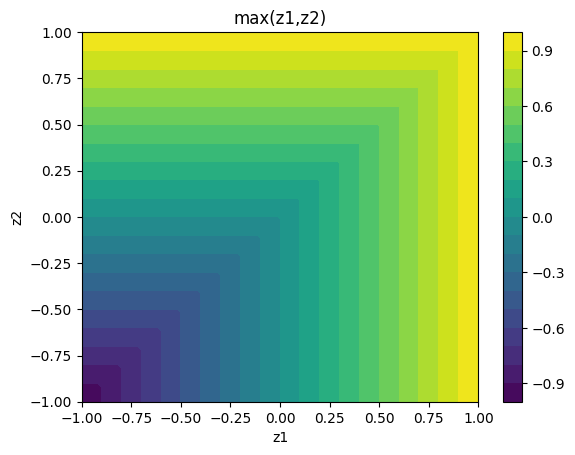

In [5]:

def lse(z1, z2, lam=1.0):
    return (1/lam) * np.log(np.exp(lam*z1) + np.exp(lam*z2))

z1 = np.linspace(-1, 1, 100)
z2 = np.linspace(-1, 1, 100)
Z1, Z2 = np.meshgrid(z1, z2)

lambdas = [1, 10, 100]

for lam in lambdas:
    L = lse(Z1, Z2, lam=lam)
    plt.figure()
    cp = plt.contourf(Z1, Z2, L, 20, cmap='viridis')
    plt.colorbar(cp)
    plt.title(f'lse(z1,z2; lambda={lam})')
    plt.xlabel('z1')
    plt.ylabel('z2')
    plt.show()

# Also compare with max(z1,z2)
M = np.maximum(Z1, Z2)
plt.figure()
cp = plt.contourf(Z1, Z2, M, 20, cmap='viridis')
plt.colorbar(cp)
plt.title('max(z1,z2)')
plt.xlabel('z1')
plt.ylabel('z2')
plt.show()


### (c)

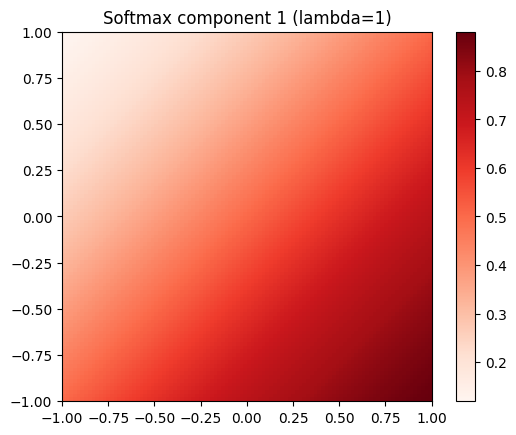

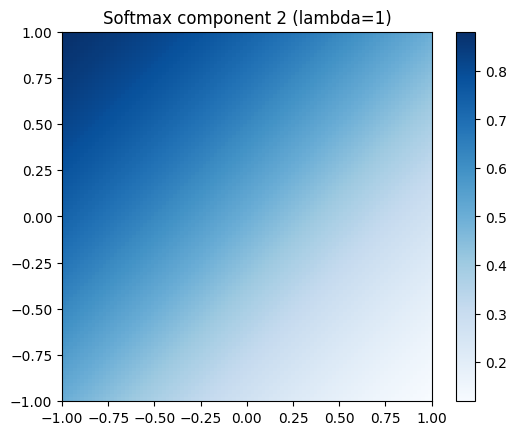

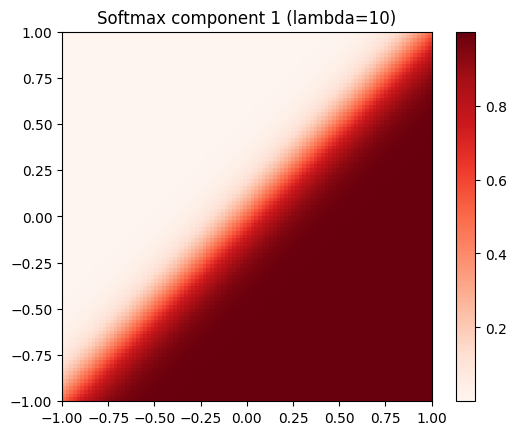

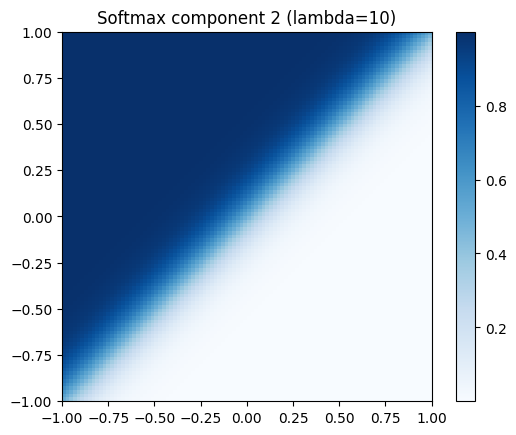

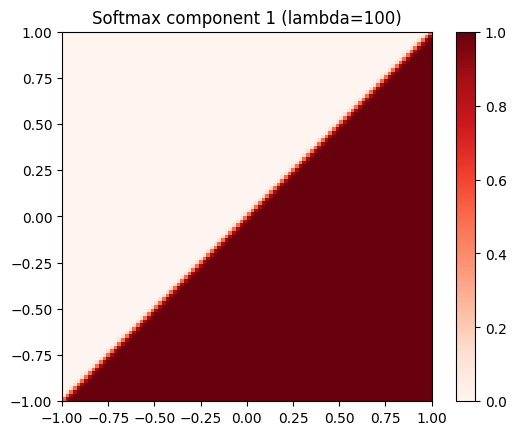

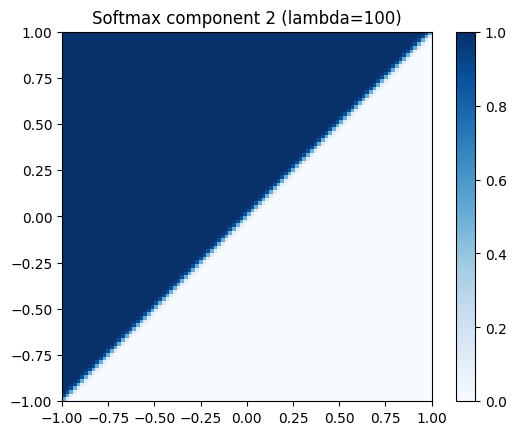

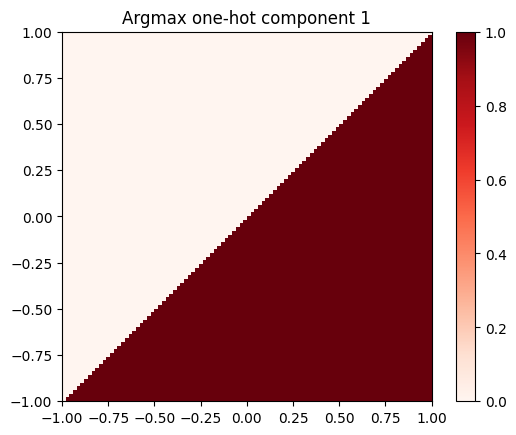

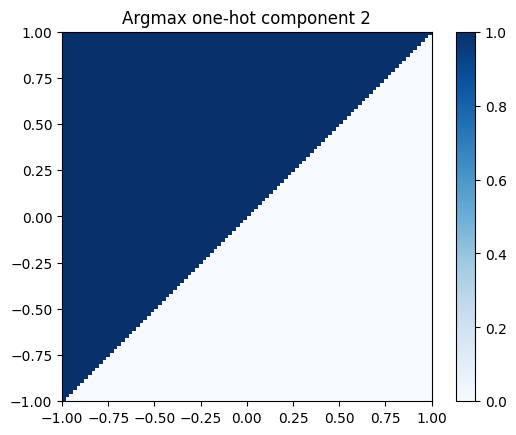

In [6]:
def softmax(z1, z2, lam=1.0):
    e1 = np.exp(lam*z1)
    e2 = np.exp(lam*z2)
    s1 = e1/(e1+e2)
    s2 = e2/(e1+e2)
    return s1, s2

for lam in lambdas:
    S1, S2 = softmax(Z1, Z2, lam)
    plt.figure()
    plt.imshow(S1, extent=[-1,1,-1,1], origin='lower', cmap='Reds')
    plt.colorbar()
    plt.title(f'Softmax component 1 (lambda={lam})')
    plt.show()

    plt.figure()
    plt.imshow(S2, extent=[-1,1,-1,1], origin='lower', cmap='Blues')
    plt.colorbar()
    plt.title(f'Softmax component 2 (lambda={lam})')
    plt.show()

# Argmax as 2D one-hot vectors
A1 = (Z1 > Z2).astype(int)
A2 = (Z1 <= Z2).astype(int)
plt.figure()
plt.imshow(A1, extent=[-1,1,-1,1], origin='lower', cmap='Reds')
plt.title('Argmax one-hot component 1')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(A2, extent=[-1,1,-1,1], origin='lower', cmap='Blues')
plt.title('Argmax one-hot component 2')
plt.colorbar()
plt.show()


## 4 Linear regions of MLPs

Total number of parameters in shallow model: 81
fc1.weight torch.Size([20, 2])
fc1.bias torch.Size([20])
fc2.weight torch.Size([1, 20])
fc2.bias torch.Size([1])


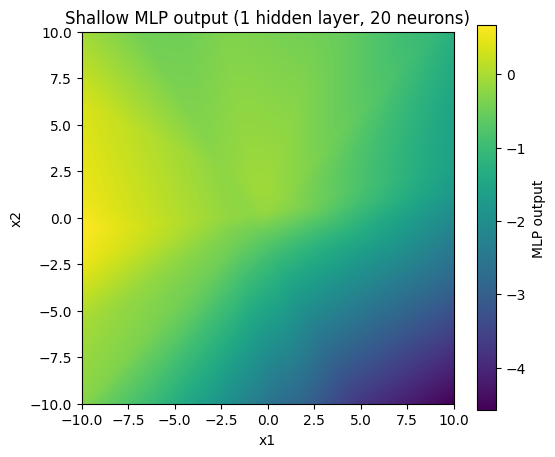

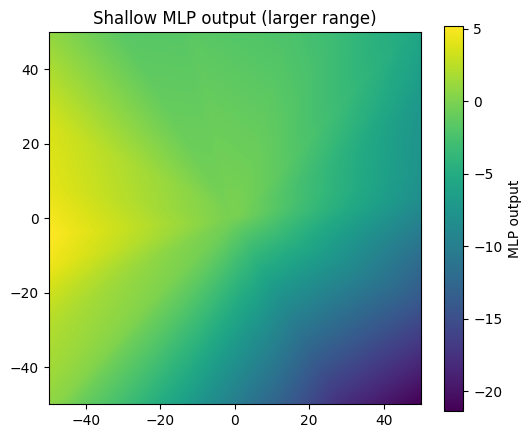

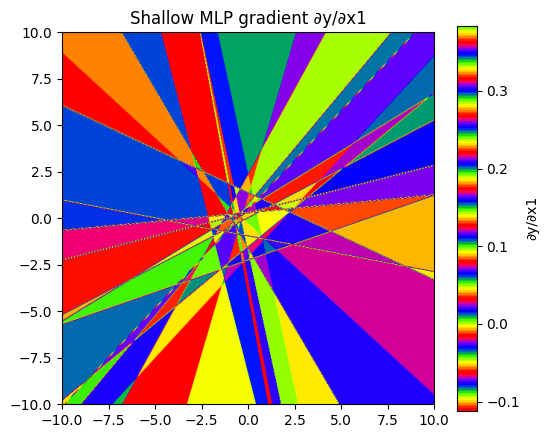

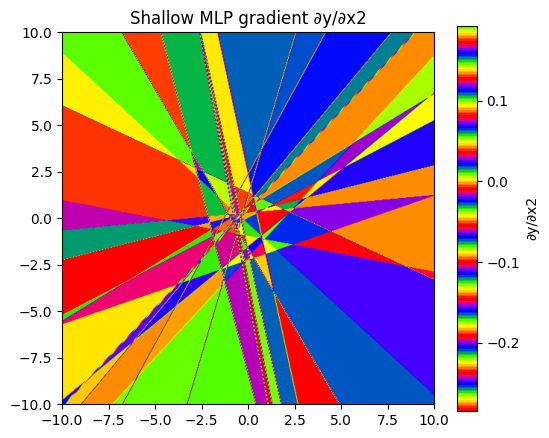

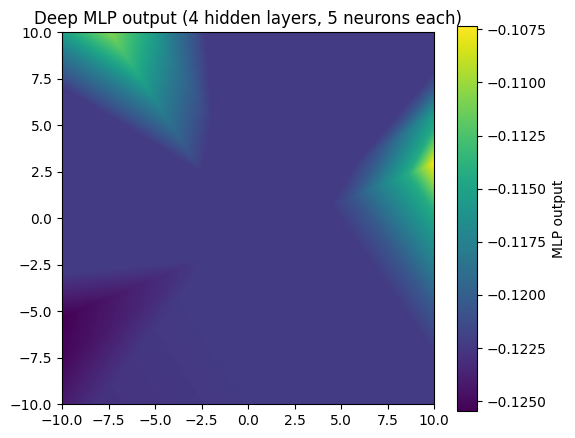

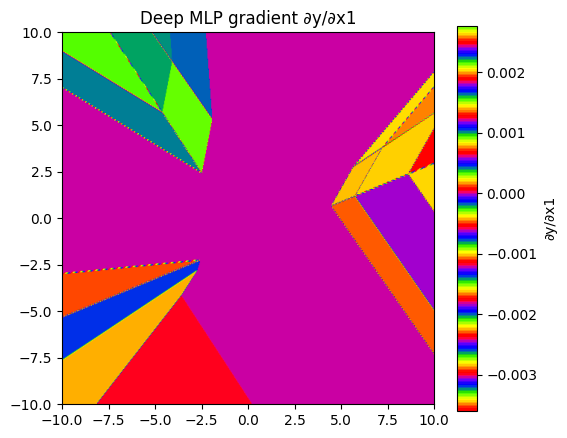

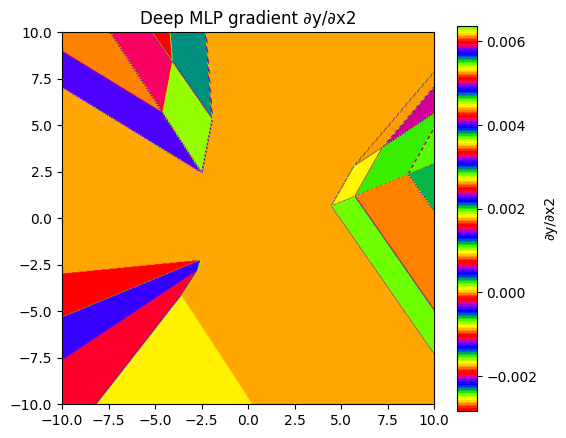

In [7]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# %%
# (a) Shallow MLP with 1 hidden layer, 20 neurons

class ShallowMLP(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=20, output_dim=1):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Instantiate model
shallow_model = ShallowMLP()

# Count parameters
total_params = sum(p.numel() for p in shallow_model.parameters())
print(f"Total number of parameters in shallow model: {total_params}")

# Optional: print layer-wise parameters
for name, param in shallow_model.named_parameters():
    print(name, param.shape)

# %%
# (b) Compute output on a dense 2D grid

# Define grid
N = 500
x1 = np.linspace(-10, 10, N)
x2 = np.linspace(-10, 10, N)
X1, X2 = np.meshgrid(x1, x2)
grid_points = np.stack([X1.ravel(), X2.ravel()], axis=1)

# Convert to torch tensor
grid_tensor = torch.tensor(grid_points, dtype=torch.float32)

# Forward pass
with torch.no_grad():
    y_grid = shallow_model(grid_tensor).numpy().reshape(N, N)

# Visualize
plt.figure(figsize=(6,5))
plt.imshow(y_grid, extent=[-10,10,-10,10], origin='lower', cmap='viridis')
plt.colorbar(label='MLP output')
plt.title('Shallow MLP output (1 hidden layer, 20 neurons)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# %%
# Try larger range
x1_large = np.linspace(-50, 50, N)
x2_large = np.linspace(-50, 50, N)
X1_large, X2_large = np.meshgrid(x1_large, x2_large)
grid_points_large = np.stack([X1_large.ravel(), X2_large.ravel()], axis=1)
grid_tensor_large = torch.tensor(grid_points_large, dtype=torch.float32)

with torch.no_grad():
    y_large = shallow_model(grid_tensor_large).numpy().reshape(N, N)

plt.figure(figsize=(6,5))
plt.imshow(y_large, extent=[-50,50,-50,50], origin='lower', cmap='viridis')
plt.colorbar(label='MLP output')
plt.title('Shallow MLP output (larger range)')
plt.show()

# Observation: due to ReLU activation, the output grows linearly along directions after the last activated ReLU.

# %%
# (c) Compute approximate spatial gradient using numpy.gradient

dy_dx1, dy_dx2 = np.gradient(y_grid, x1, x2)  # approximate derivatives along axes

plt.figure(figsize=(6,5))
plt.imshow(dy_dx1, extent=[-10,10,-10,10], origin='lower', cmap='prism')
plt.colorbar(label='∂y/∂x1')
plt.title('Shallow MLP gradient ∂y/∂x1')
plt.show()

plt.figure(figsize=(6,5))
plt.imshow(dy_dx2, extent=[-10,10,-10,10], origin='lower', cmap='prism')
plt.colorbar(label='∂y/∂x2')
plt.title('Shallow MLP gradient ∂y/∂x2')
plt.show()

# Observation: gradients are piecewise constant, changing at ReLU activation boundaries.

# %%
# (d) Deeper MLP: 4 hidden layers, 5 neurons each

class DeepMLP(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=5, num_layers=4, output_dim=1):
        super().__init__()
        layers = []
        layers.append(nn.Linear(input_dim, hidden_dim))
        layers.append(nn.ReLU())
        for _ in range(num_layers-1):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_dim, output_dim))
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)

# Instantiate deep model
deep_model = DeepMLP()

# Forward pass on the same grid
with torch.no_grad():
    y_deep = deep_model(grid_tensor).numpy().reshape(N, N)

plt.figure(figsize=(6,5))
plt.imshow(y_deep, extent=[-10,10,-10,10], origin='lower', cmap='viridis')
plt.colorbar(label='MLP output')
plt.title('Deep MLP output (4 hidden layers, 5 neurons each)')
plt.show()

# %%
# Compute gradient of deep MLP output
dy_dx1_deep, dy_dx2_deep = np.gradient(y_deep, x1, x2)

plt.figure(figsize=(6,5))
plt.imshow(dy_dx1_deep, extent=[-10,10,-10,10], origin='lower', cmap='prism')
plt.colorbar(label='∂y/∂x1')
plt.title('Deep MLP gradient ∂y/∂x1')
plt.show()

plt.figure(figsize=(6,5))
plt.imshow(dy_dx2_deep, extent=[-10,10,-10,10], origin='lower', cmap='prism')
plt.colorbar(label='∂y/∂x2')
plt.title('Deep MLP gradient ∂y/∂x2')
plt.show()

# Observation: Deep MLP creates more complex, fine-grained piecewise-linear patterns.
# Shallow MLP has simpler, broader linear regions; deep MLP can create many small linear regions due to multiple ReLU layers.
